In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
#Pressure function
def press(x,y):
    return (x*1.38e-16*y)
#Calculations
print('Solar Corona:', "{:0.5e}".format(press(1e9,2e6)))
print('Earth Sea Level:', "{:0.5e}".format(press(2.7e19,288.15)))

Solar Corona: 2.76000e-01
Earth Sea Level: 1.07365e+06


La presión del aire al nivel del mar excede en 7 órdenes de magnitud a la presión del plasma en la corona Solar. 

Los valores de calores específicos para el monóxido de carbomo son:
    cp (kJ/(kg K)): 1.02 	
    cv (kJ/(kg K)): 0.72
Y sus grados de libertad, al ser un gas diatómico son 5

In [1]:
def gamma(cp,cv):
    return (cp/cv)
cp = 1.02
cv = 0.72
f = 5
print('El índice politrópico es:', "{:0.5e}".format(gamma(cp,cv)))
print('El índice politrópico es:', "{:0.5e}".format(1+2/f))

El índice politrópico es: 1.41667e+00
El índice politrópico es: 1.40000e+00


c) The mean particle mass (mean molecular weight) of air in our atmosphere (remember Nytrogen is the most abundant element). Once calculated, add it to the phase diagram 𝑇 vs. 𝜇 shown in class. How does the value compare to that of atomic hydrogen?

In [3]:
def mass (x,A,Z):
    f = (x/A)*(1+Z)
    return f

miu = 1/(mass(0.78,14,7) + mass(0.21,16,8) + mass(0.009,39,18))
print(miu)



1.7598696536102707


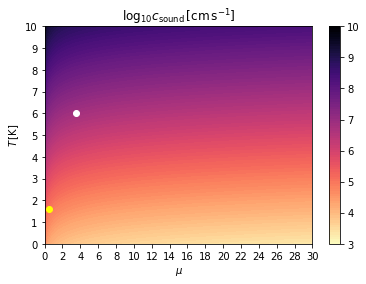

In [46]:
mu = np.arange(0,30,0.01)
temperature = np.arange(0,10,0.01)

X, Y = np.meshgrid(mu, temperature)


mu1 = miu
T1 = 6

mu2 = 0.5
T2 = 1.60205999133

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, np.log10(Z), levels=np.linspace(3, 10, 91), cmap='magma_r')
ax.scatter(mu1, T1, c='white')
ax.scatter(mu2, T2, c='yellow')
    
# Barra de color 
fig.colorbar(cp, ticks = np.arange(3,11,1))
ax.set_title(r'$\log_{10} c_{\rm sound}\,\rm [cm\,s^{-1}$]')
ax.set_xticks(np.arange(0,31.0,2.0))
ax.set_xlabel(r'$\mu$')
ax.set_yticks(np.arange(0,11,1))
ax.set_ylabel(r'$T\,\rm [K]$')
plt.show()

In [5]:
def Re(rho, vel, length, mu):
    f=(rho*vel*length)/(mu)
    return f 

# All values are in SI

mu=3e-3    #The dynamic viscocity of blood through aorta
le=0.04    #Max lenght of human aorta
rho=1125   #Blood density
vel=0.66   #Max speed of blood through aorta 


print('The Reynolds number of blood through aorta is  aproximately:', "{:0.5e}".format(Re(rho,vel,le,mu)))

The Reynolds number of blood through aorta is  aproximately: 9.90000e+03


#Problem 2.

Considering the example of the swimming fish we saw in class, calculate the Reynolds numbers for different swimming speeds and make a plot of 𝑅e
vs. speed. Indicate the laminar and turbulent regimes on the plot. At which speed does the fish start generating a turbulent flow in sea water?

The fish can reach speeds of the order of: 𝑣=100kmh−1=27.78ms−1

The dynamic viscosity of sea water is: 𝜇=0.00122Nm−2s

The fish height is about: 𝑙=1m

And, the water density at 15C is: 𝜌=1026kgm−3

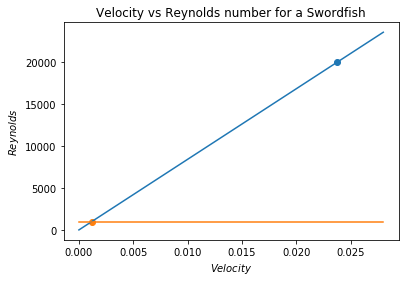

Their maximum speeds of around: 2.37600e-02
The sailfish and swordfish start to generate turbulence at a value of: 1.18908e-03


In [57]:
def Re(rho, vel, length, mu):
    f=(rho*vel*length)/(mu)
    return f

vel=np.arange(0,0.03,2e-3)
mu=0.00122
length=1
rho=1026

Re1=1.99818e+04
vel1=0.02376
Re2= 1000
vel2=1000*mu/(rho*le)

fig,ax=plt.subplots(1,1) 

ax.plot(vel, Re(rho,vel,length,mu))
ax.plot(vel, 1000*np.ones(len(vel)))
ax.scatter(vel1,Re1)
ax.scatter(vel2,Re2)
ax.set_title('Velocity vs Reynolds number for a Swordfish')
ax.set_xlabel(r'$Velocity$')
ax.set_ylabel(r'$Reynolds$')
plt.show()
print('Their maximum speeds of around:',"{:0.5e}".format(vel1))
print('The sailfish and swordfish start to generate turbulence at a value of:',"{:0.5e}".format(vel2))


#Problem 3.

Download the full dataset from the 2D turbulence simulation that we analysed in class (TURB_DRIVE) and:

a)Calculate the rms flow velocity and the corresponding rms Mach number as a function of time (see equations in the lecture notebook).

In [ ]:
input_directory="./simulation_data/TURB_DRIVE/"
file_name = "data.0010.vtk"
reader = vtk.vtkDataSetReader()
reader.SetFileName(input_directory+file_name)
reader.ReadAllScalarsOn()
reader.ReadAllVectorsOn()
reader.Update()
data = reader.GetOutput()
dens = data.GetCellData().GetArray("rho")
velx = data.GetCellData().GetArray("vx1")
vely = data.GetCellData().GetArray("vx2")
bfix = data.GetCellData().GetArray("Bx1")
bfiy = data.GetCellData().GetArray("Bx2")
dim = data.GetDimensions()
vec = list(dim)
vec = [i-1 for i in dim]
rho = np.reshape(dens,(vec[0],vec[1]))
vx = np.reshape(velx,(vec[0],vec[1]))
vy = np.reshape(vely,(vec[0],vec[1]))
Bx = np.reshape(bfix,(vec[0],vec[1]))
By = np.reshape(bfiy,(vec[0],vec[1]))
rho_norm = 1.66e-24 #g/cm^3
L_norm = 3.086e+18 #cm = 1pc (parsec)
v_norm = 1.e+6 #cm/s
B_norm = np.sqrt(4*math.pi*rho_norm*v_norm**2)
rho_cgs = rho*rho_norm
vx_cgs = vx*v_norm
vy_cgs = vy*v_norm
Bx_cgs = Bx*B_norm
By_cgs = By*B_norm
speed = np.sqrt(vx_cgs**2+vy_cgs**2)
bmagf = np.sqrt(Bx_cgs**2+By_cgs**2)
kener = 0.5*rho_cgs*speed**2
def magnitude(component1, component2):
    magn = np.sqrt(component1**2+component2**2)
    return magn
speed1 = magnitude(vx_cgs,vy_cgs)
bmagf1 = magnitude(Bx_cgs,By_cgs)